# Classification Techniques - Titanic Passenger Information Dataset

## Problem Identification

The sinking of the Titanic is the most famous shipwrecks in history. Unfortunately, more than 1500 people didn’t survive. 

In this challenge, we built a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

After clearing the noise in the data, we proceeded by performing mulltiple classification models including Random Forest, Extra Tree, Support Vector Machine, KNN, Logistic Regression and Decision Tree to get the best score. Furthermore, we used Ensemble and tuning techniques in an attempt to increase the accuracy of our models.


##  Model  Accuracy Table
|Model|Score|Specific setting|
|:-|:------|:---------------------|
|KNN|0.50956|KNN K-fold = 5, cross validation|
|Decision Tree|0.74880|Grid search|
|Random Forest|0.75358|drop(column= ‘embarked_C’)|
|Random Forest|0.75358|dummy(drop_first=True),drop(column= 'embarked_Q')|
|Random Forest|0.75837|dummy(drop_first=True),drop(column= 'parch')|
|Logistic Regression|0.76315|drop(column= ‘cabin’)|
|KNN|0.76315|drop(column= ‘cabin’)|
|Random Forest|0.76315|drop(column= ‘cabin’)|
|Gradient Boosting Classifier|0.76315|n_estimators=100, learning_rate=1.0,                             max_depth=1, random_state=0|
|Extra Tree|0.76555|Grid search, best model|
|Logistic regression|0.76555|with new feature 'relative'|
|SVM|0.76555|K-fold = 5, cross validation|
|Random Forest|0.77272|Grid search, best model|
|Random Forest|0.77272|Grid search, best model,bagging classifier|
|Decision Tree|0.77272|Grid search, bagging classifier|




##  Summary

In Model accuracy table above, muiltple models of different settings were applied to predict the survival of passengers in aboard Titanic ship. The best prediction accuracy for survival was 0.77272. Imporoving the model accuracy was challenging since multiple models of different settings resulted in similar scores. 
 
Suggestions to improve the model accuracy include, dealing with outliers without necessarily removing them. Furthermore, the majority of null values were in the cabin column. More analysis is required to predict the correct values of missing values. Creating new data through feature engineering might further improve the model performance.


--- 
**Team members (Group 9)**
 - Fahdah Alalyan - fahdah.a15@gmail.com   
 - Amjaad Alsubaie - amjaad_636@hotmail.com  
 - Ahmed Adam - am4ma@hotmail.com
 
**Kaggle Kernal,** 
[here](https://www.kaggle.com/fahdahalalyan/classification-techniques-titanic)
 
---



##  Data Wrangling

Let's read the data.


In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_biclusters

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm

sns.set_style('whitegrid')
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:


# # Kaggle reading data sets.


# train_or = pd.read_csv("/kaggle/input/titanic/train.csv")
# test_or = pd.read_csv("/kaggle/input/titanic/test.csv")
# g_s_or = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

# train = pd.read_csv("/kaggle/input/titanic/train.csv")
# test = pd.read_csv("/kaggle/input/titanic/test.csv")
# g_s = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")



#-------------------------------------------


#load data.
# assigning orignal df
train_or = pd.read_csv('../data/train.csv')
test_or = pd.read_csv('../data/test.csv')
g_s_or = pd.read_csv('../data/gender_submission.csv')

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')


##  Data Cleaning and Data Exploration
###  Displaying data

In [3]:
train.head() # display

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head() # display

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Displying the shape of datasets** 

In [5]:
train.shape
test.shape

(418, 11)

###  How complete is the data?

Investigating missing values etc.

In [6]:
train.isna().sum() # get the numbers of null values.
# Age, Cabin and Embarked columns have null values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isna().sum() # get the numbers of null values.
# Age, Fare, and Cabin columns have null values.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

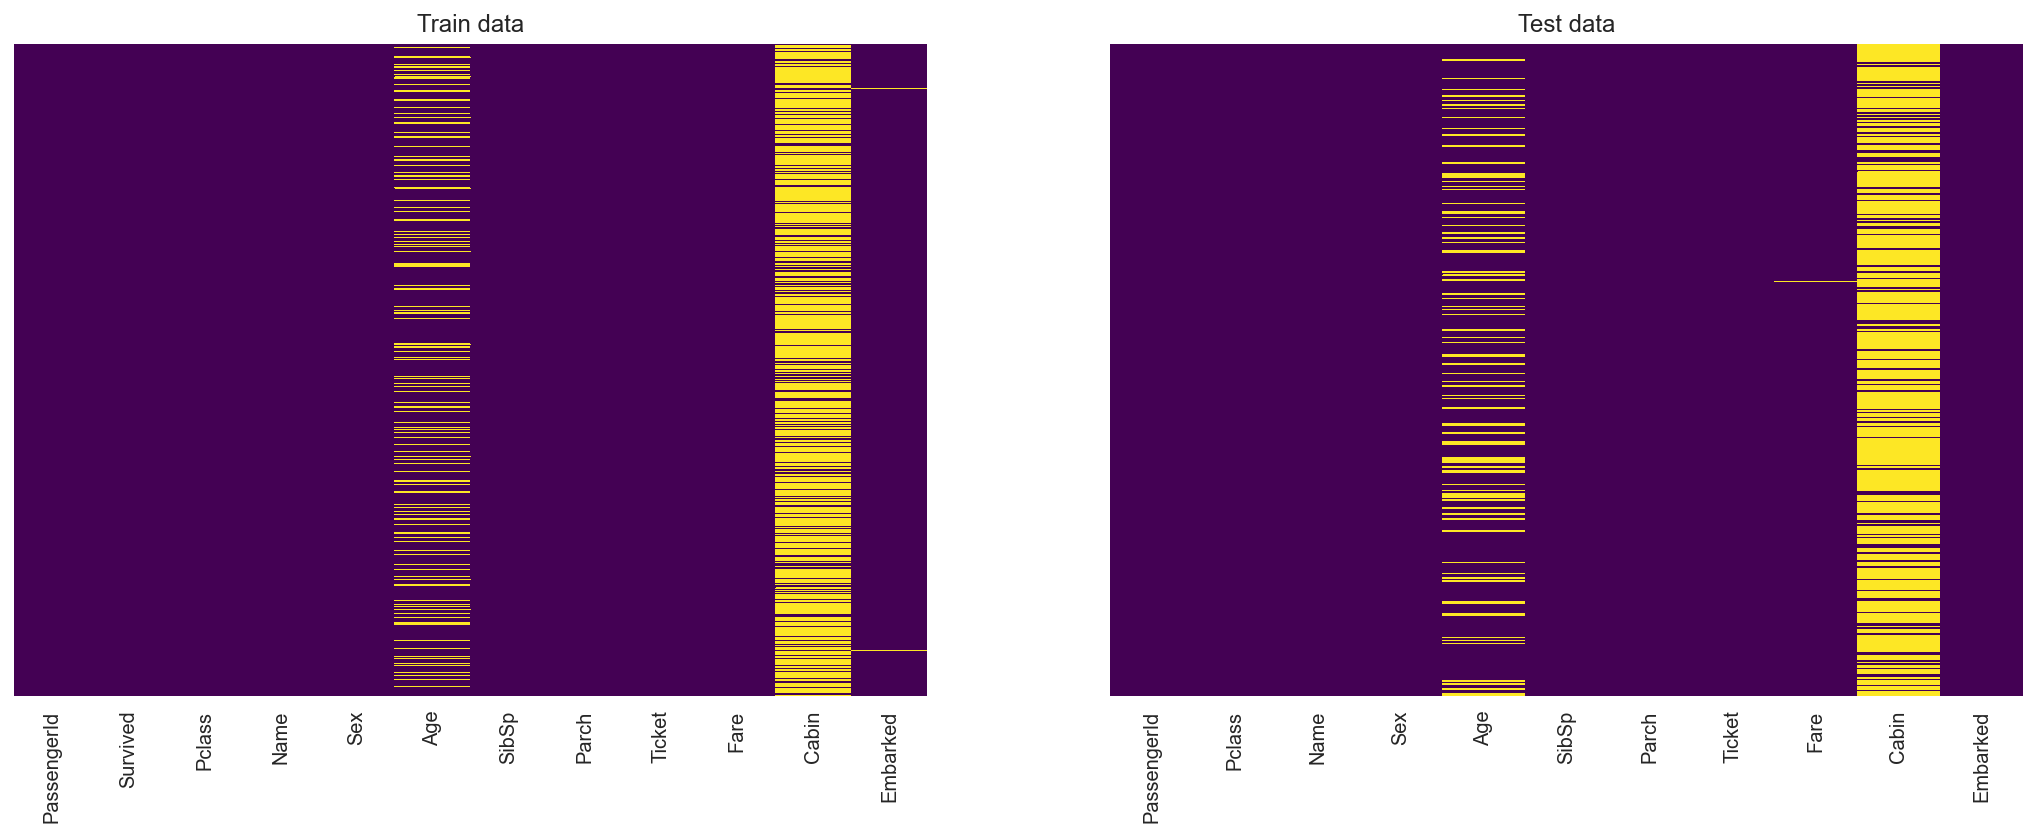

In [8]:
# Another way of visualize null values.
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

###  Investigating data types
Displaying the data types of each feature. 

In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

###  Renaming columns

In [11]:
# renaming train columns
train = train.rename(columns={'PassengerId':"id",
                                    'Pclass':'p_class',
                                    'Name':"name",
                                    "Sex":"sex",
                                    "Age":"age",
                           "SibSp":"sib_sp",
                           "Parch":"parch",
                           "Ticket":"ticket",
                           "Fare":"fare",
                           "Cabin":"cabin",
                           "Embarked":"embarked",
                          "Survived":"survived"})
train.head() # checking

,id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# renaming test columns
test = test.rename(columns={'PassengerId':"id",
                                    'Pclass':'p_class',
                                    'Name':"name",
                                    "Sex":"sex",
                                    "Age":"age",
                           "SibSp":"sib_sp",
                           "Parch":"parch",
                           "Ticket":"ticket",
                           "Fare":"fare",
                           "Cabin":"cabin",
                           "Embarked":"embarked"})

test.head() # checking

,id,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Creating a data dictionary


* id -- PassengerId
* survived -- 0 = No, 1 = Yes
* p_class -- Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* name -- Passenger name 
* sex -- male / female 	
* age -- age in years	
* sib_sp -- no. of siblings / spouses aboard the Titanic	
* parch -- no. of parents / children aboard the Titanic	
* ticket -- Ticket number	
* fare -- Passenger fare	
* cabin -- Cabin number	
* embarked -- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

						

###  Filling missing data.

**filling missing data with the port of highest embarkation**

In [13]:
# displying how many ports are in Embarked column?(train data)
train.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [14]:
# code.
# # S manually .
# train['embarked']= train.embarked.replace(np.nan,'S')
# train.embarked.value_counts()

# S auto.
max_em=train.loc[train.embarked.value_counts().max()]['embarked']
train['embarked']= train.embarked.replace(np.nan,max_em)

train.embarked.value_counts() # to check.


S    644
C    170
Q     77
Name: embarked, dtype: int64

**(test data) What is the `Pclass` of missing fare in test dataset. Printing the complete row here.**

In [15]:
test[test.fare.isnull()]

,id,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


####  Computing the average of `Fare` of the missing `Pclass` (test data) 

In [16]:
x_mean= np.mean(test[test['p_class']==3]['fare'])
print('The mean fare for the Pclass (for missing fare data) is: ', x_mean)

The mean fare for the Pclass (for missing fare data) is:  12.459677880184334


**Getting the mean fare, and filling the missing value of `Fare` with everyone from the same `Pclass` (test data)**

In [17]:
# only one data point has a null value in the Fare column. 
# The data point has 3 in Pclass= 3 column.
# Therefore, replacing the null value with the average of fares in class 3. 

test['fare']= test.fare.replace(np.nan,x_mean)

test[test['id']==1044]

,id,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.459678,NaN,S


In [18]:
test.isna().sum() # to check null values in Fare column.

id            0
p_class       0
name          0
sex           0
age          86
sib_sp        0
parch         0
ticket        0
fare          0
cabin       327
embarked      0
dtype: int64

### Treating the `Age` column

**computing mean age of each Pclass in the train data**

In [19]:
list_a={}
for i in sorted(train['p_class'].unique()): # for each class.
# saving it as dictionary type and use it for the following questions.
    list_a[i]= np.mean(train[train['p_class']==i]['age']) # Calculating the fare average for each class.
list_a    

{1: 38.233440860215055, 2: 29.87763005780347, 3: 25.14061971830986}

**Writing a function `impute_age` to fill the mean age with respect to each `Pclass`.**<br>

In [20]:
# manually:

# train.loc[(train['class']==1) & (train['age'].isna()),'age']= list_a[1]
# train.loc[(train['class']==2) & (train['age'].isna()),'age']= list_a[2]
# train.loc[(train['class']==3) & (train['age'].isna()),'age']= list_a[3]

# using function
# defining a function 'impute_age'
nu_classes=[]
for i in train['p_class'].unique(): # get the unique values of Pclass column.  
    nu_classes.append(i)
nu_classes

def impute_age(age_pclass): # train or test
    # for each class, filling missing value in Age with it's ava.
    for i in nu_classes: # 1,2,3
        x_mean= list_a[i] # get ava.
        # update and chane null values with ava.        
        age_pclass.loc[(age_pclass['p_class']==i) & (age_pclass['age'].isna()),'age']= list_a[i]
        
# impute_age(train)
# impute_age(test)
# #train.head(32) # to check


**Using the above function for both datasets (train and test) and filling the missing data in `Age` column accordingly.**

In [21]:
# call the function to update train and test dataframes.
# (for train) grab age and apply the impute_age, our custom function
impute_age(train)
# (for test) grab age and apply the impute_age, our custom function 
impute_age(test)

In [22]:
train.isna().sum() # checking null values.

id            0
survived      0
p_class       0
name          0
sex           0
age           0
sib_sp        0
parch         0
ticket        0
fare          0
cabin       687
embarked      0
dtype: int64

In [23]:
test.isna().sum() # checking null values.

id            0
p_class       0
name          0
sex           0
age           0
sib_sp        0
parch         0
ticket        0
fare          0
cabin       327
embarked      0
dtype: int64

### Feature Engineering.



####  Performing Feature Engineering on  `Cabin` column 

- If there originally was a value for `Cabin` -- putting 1
- If the value is missing/null -- putting 0

In [24]:
# Updating Cabin column in train data frame.
train.loc[pd.notna(train['cabin']), 'cabin'] = 1 # not null with 1
train.loc[pd.isna(train['cabin']), 'cabin'] = 0 # null with 0

train['cabin'].unique() # to check

array([0, 1], dtype=object)

In [25]:
# # Updating Cabin column in test data frame.
test.loc[pd.notna(test['cabin']), 'cabin'] = 1 # not null with 1
test.loc[pd.isna(test['cabin']), 'cabin'] = 0 # null with 0

test['cabin'].unique() #to check

array([0, 1], dtype=object)

In [26]:
train.isna().sum() # to check

id          0
survived    0
p_class     0
name        0
sex         0
age         0
sib_sp      0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [27]:
test.isna().sum() # to check

id          0
p_class     0
name        0
sex         0
age         0
sib_sp      0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

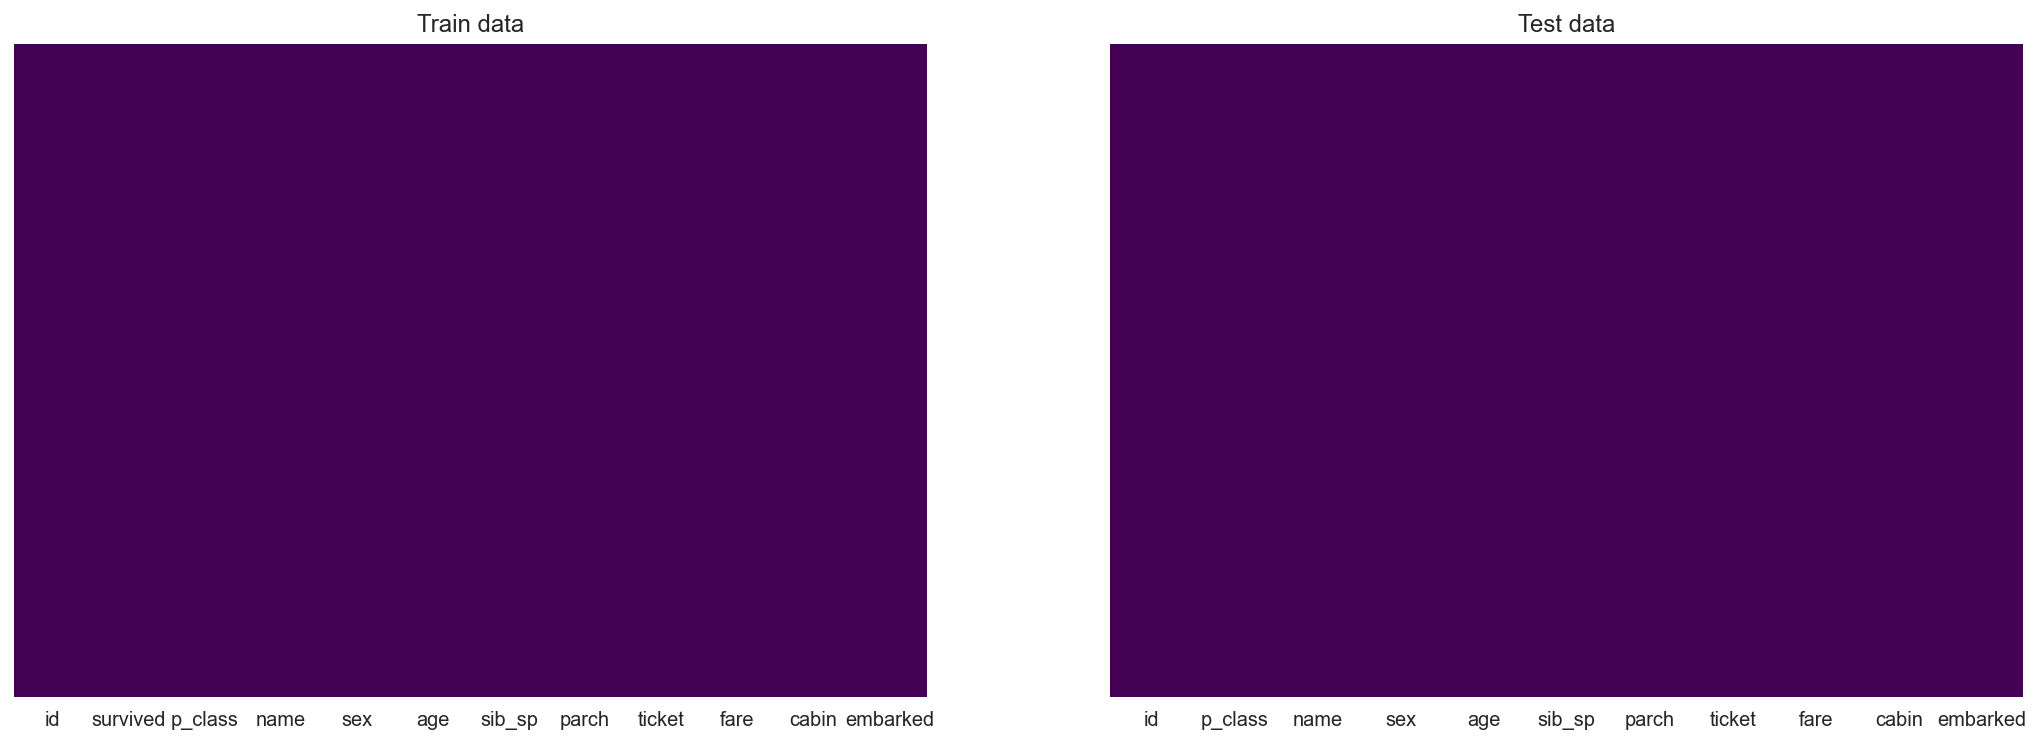

In [28]:
# re-visualization of null values.
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

#### Excellent, looks all good. No more missing data!

###  Dummies

In [29]:
# Dummy the `Sex` and `Embarked` columns.


train_final=train.copy()
train_final= pd.get_dummies(train_final, columns=['sex'],drop_first=True)
train_final= pd.get_dummies(train_final, columns=['embarked'],drop_first=True)


train= pd.get_dummies(train, columns=['embarked']) # to get categorical column. 
train= pd.get_dummies(train, columns=['sex'])  # to get categorical column. 



In [30]:
train.head() # to check.

,id,survived,p_class,name,age,sib_sp,parch,ticket,fare,cabin,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,0,1,0,1


In [31]:


test_final=test.copy()
test_final= pd.get_dummies(test_final, columns=['sex'],drop_first=True)
test_final= pd.get_dummies(test_final, columns=['embarked'],drop_first=True)



test = pd.get_dummies(test, columns=['embarked'])  # to get categorical column. 
test = pd.get_dummies(test, columns=['sex'])  # to get categorical column. 

test.head() # to check.

,id,p_class,name,age,sib_sp,parch,ticket,fare,cabin,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,0,1,1,0


**Using heatmap to compare the difference between above and below heatmaps, to see new columns after dummies**

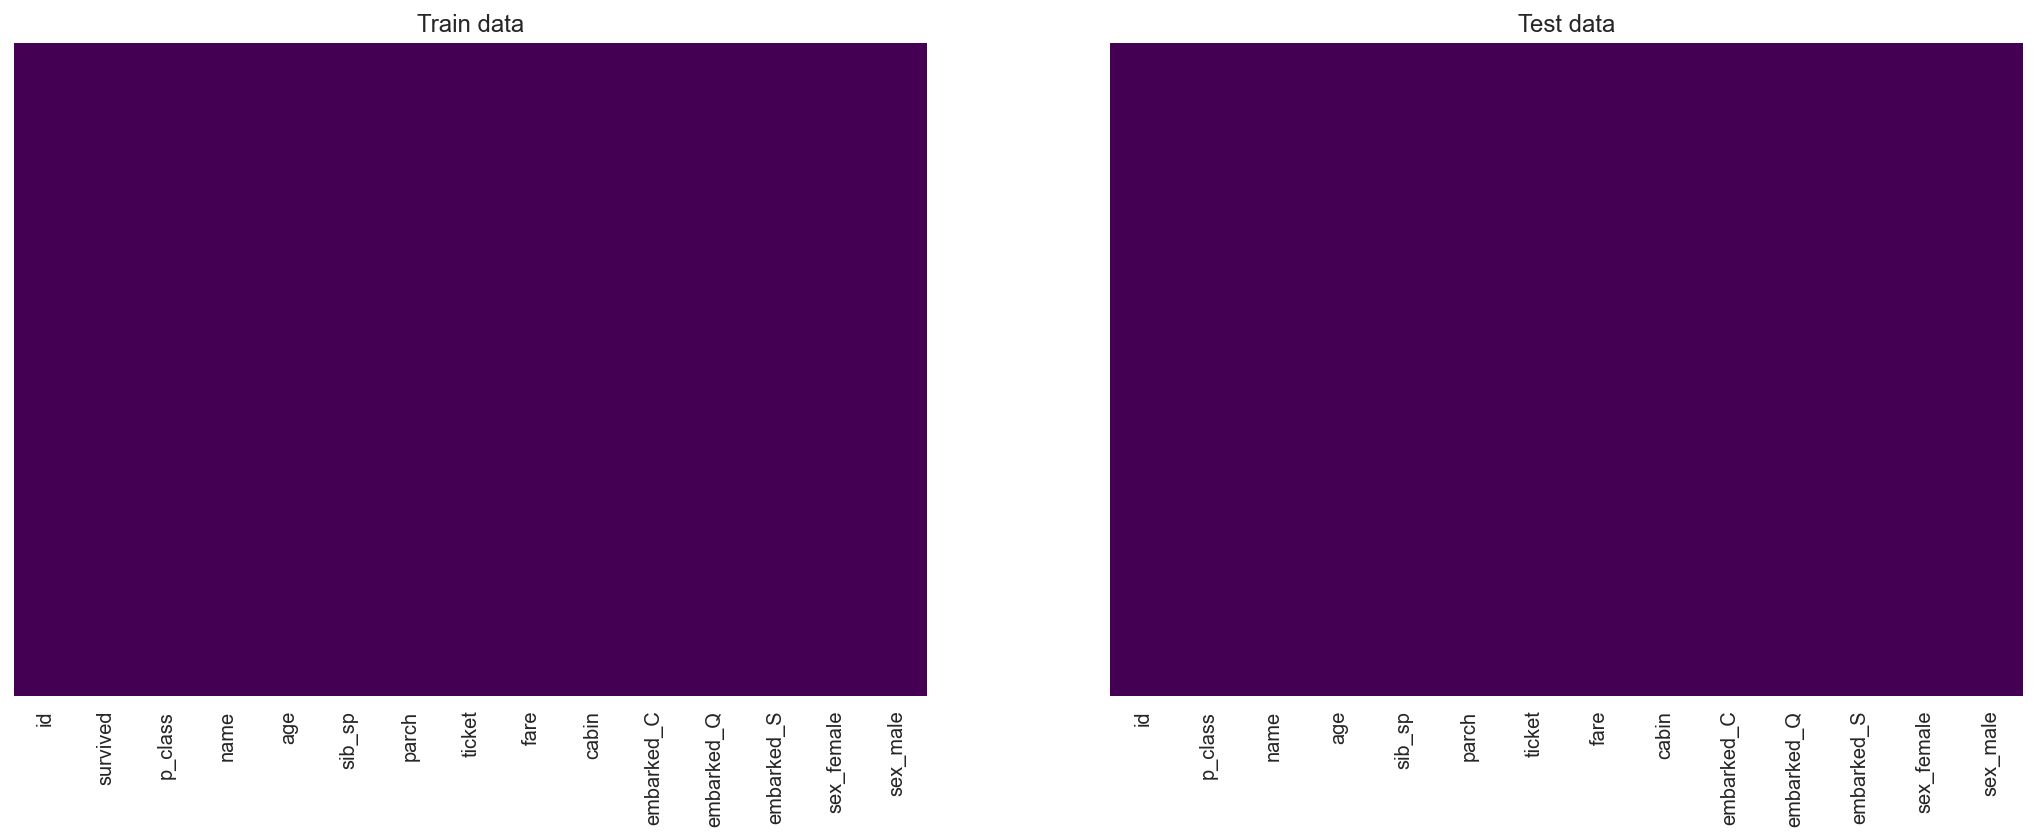

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

####  - Statistical Measures


**From displayed dataframes below, outliers can be noticed in different columns. More investigation is needed**

In [33]:
train.describe() # statics 

,id,survived,p_class,age,sib_sp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208,0.190797,0.086420,0.722783,0.352413,0.647587
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429,0.393150,0.281141,0.447876,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
test.describe() # statics 

,id,p_class,age,sib_sp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.555296,0.447368,0.392344,35.571764,0.244019,0.110048,0.645933,0.363636,0.636364
std,120.810458,0.841838,12.846509,0.896760,0.981429,55.851997,0.430019,0.313324,0.478803,0.481622,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,25.140620,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.471875,0.000000,0.000000,1.000000,1.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualization

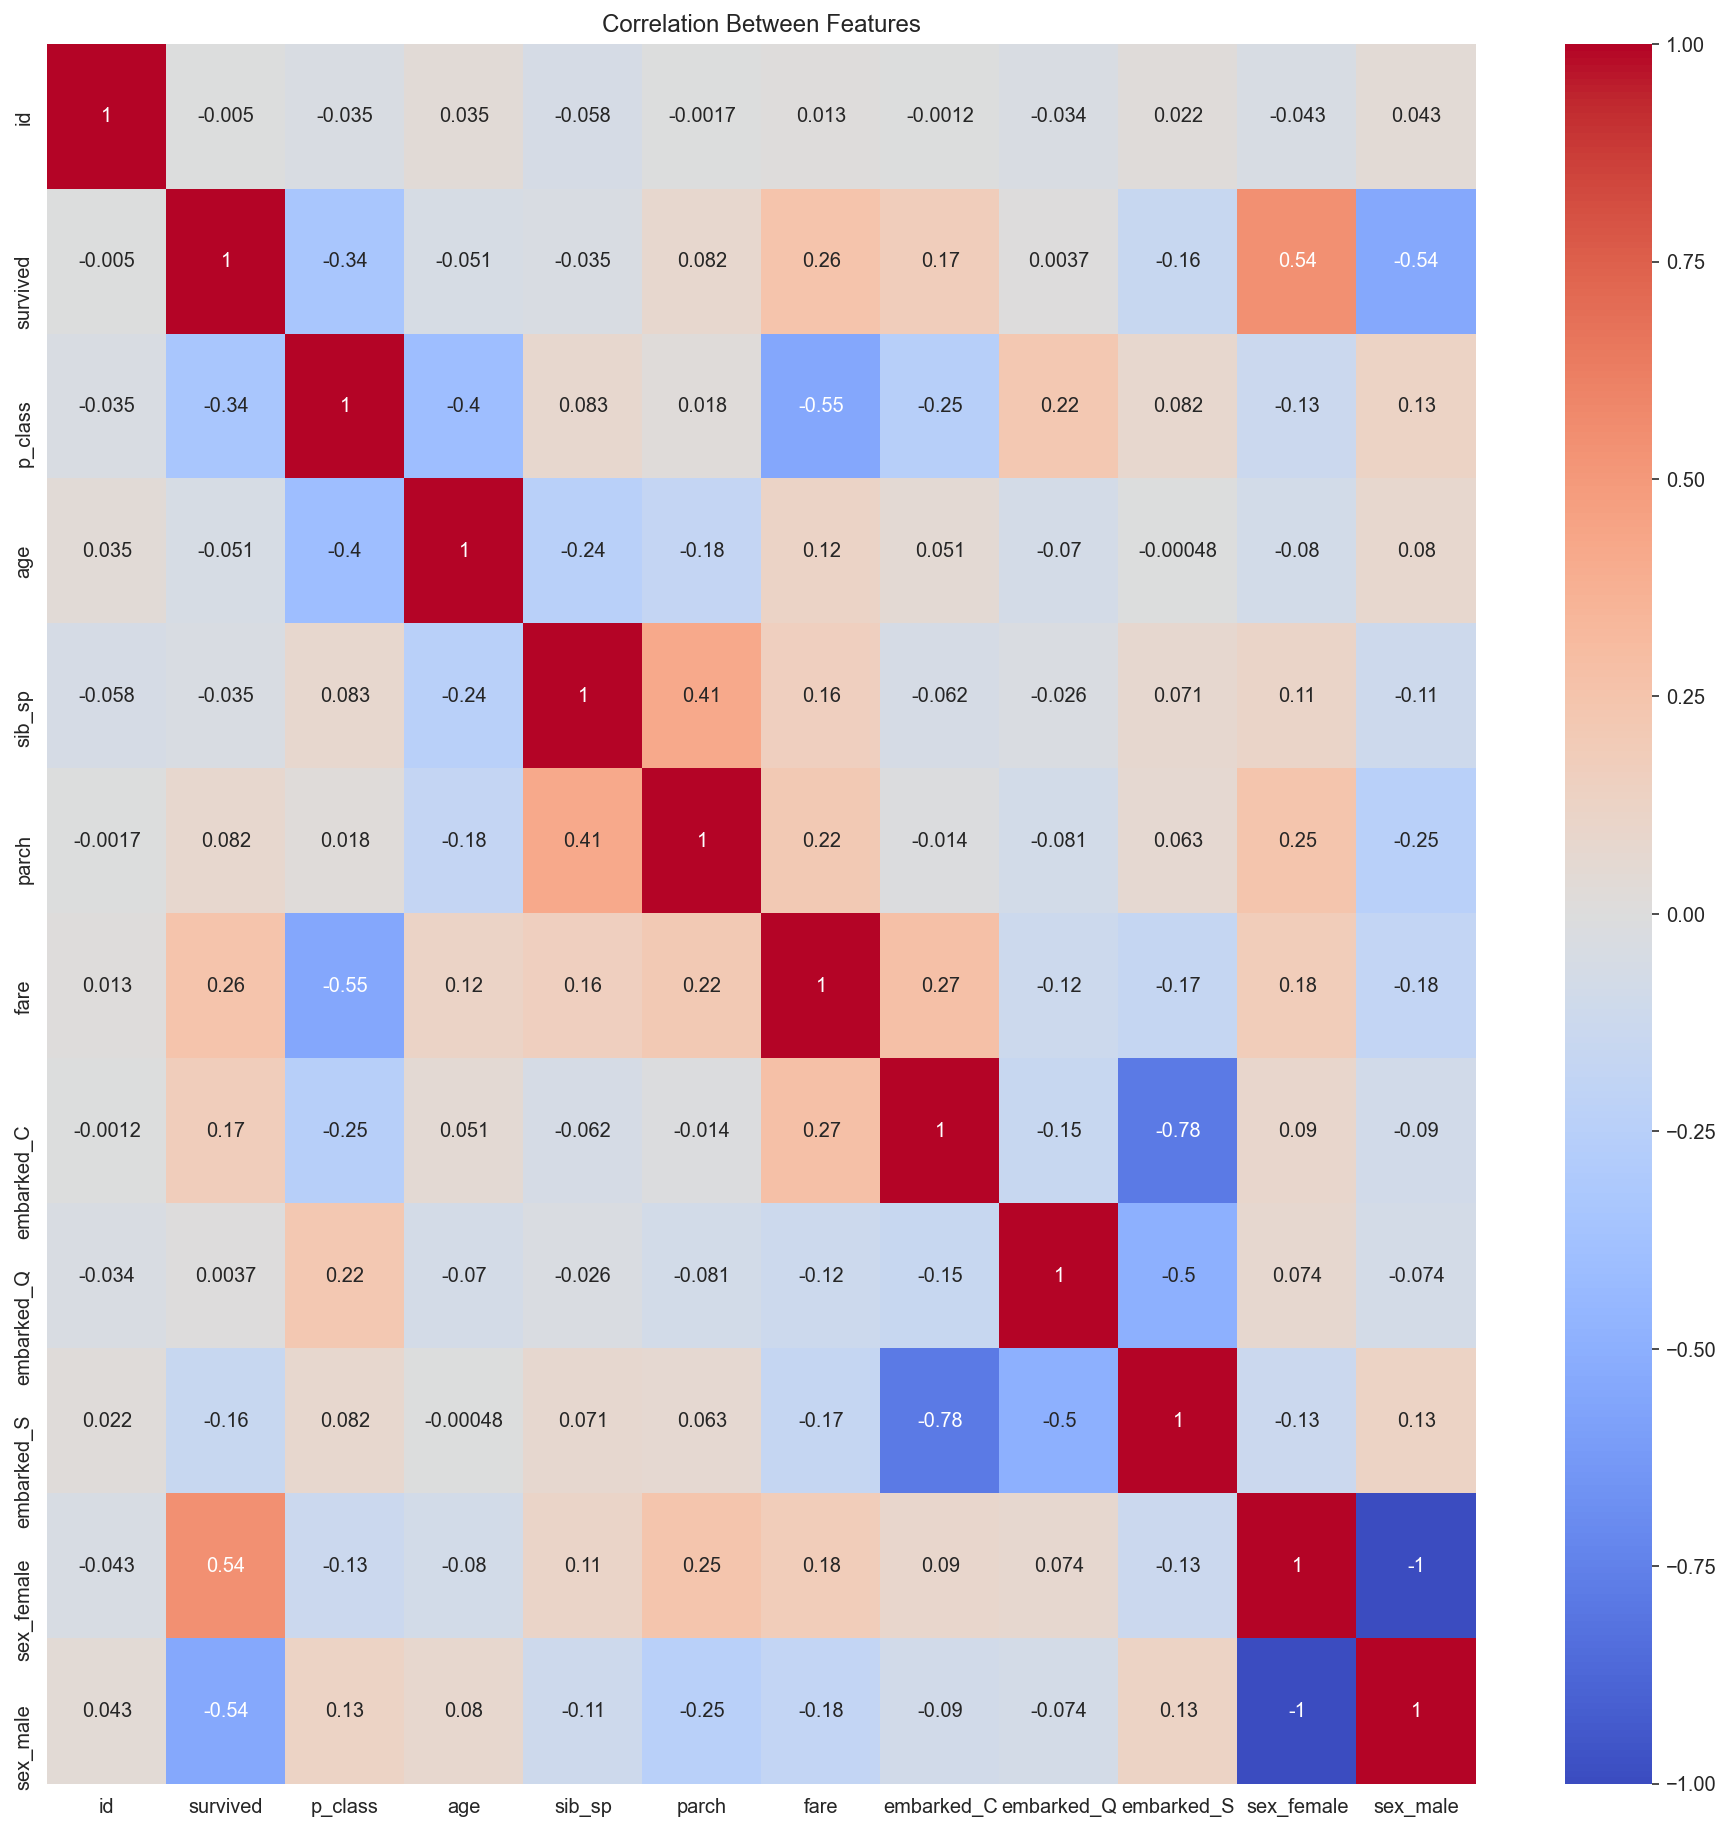

In [35]:
# plotting heatmap to identify correlations
fig, ax = plt.subplots(figsize = (16,16))
sns.heatmap(train.corr(),annot = True, cmap = 'coolwarm')
ax.set_title('Correlation Between Features');

In [36]:
# function to have similar min/max values
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

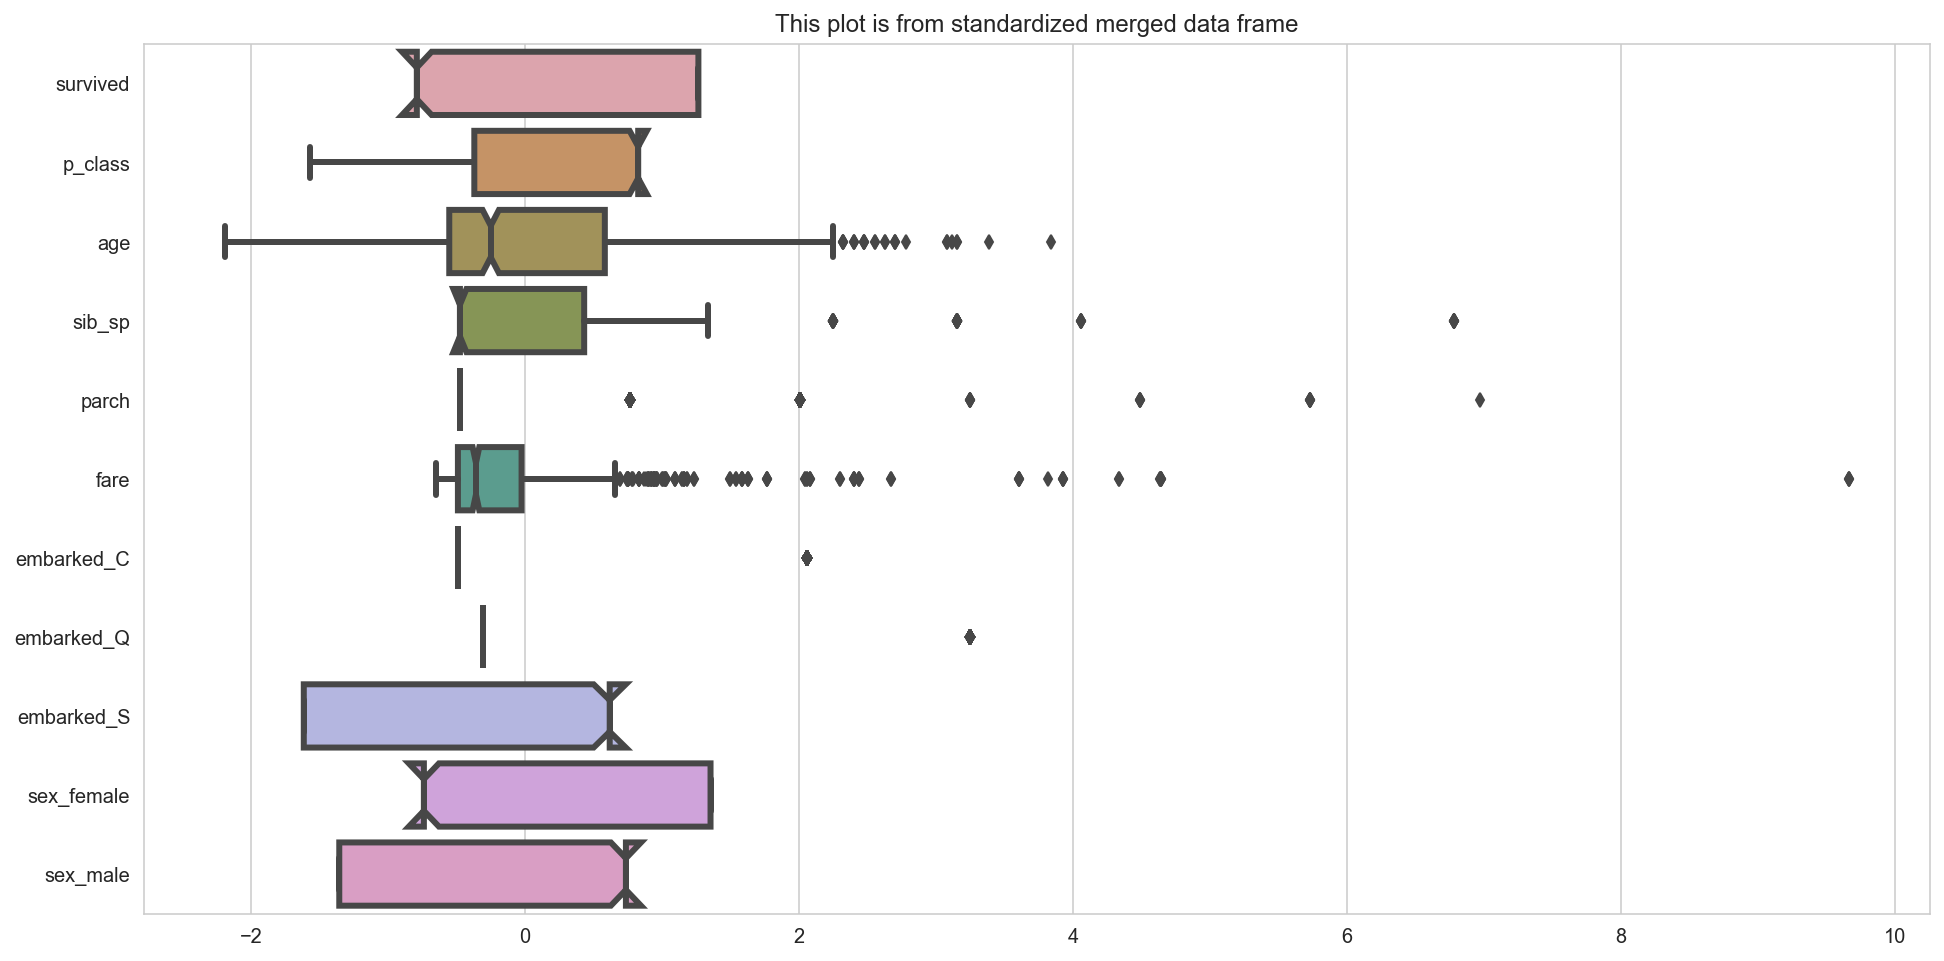

In [37]:
# plotting boxplot to investigate outliers
merge_df_stand = var_standardized(
    train.select_dtypes(exclude=['object']).drop(['id'], axis=1)) # only numeric columns and drop year. 

fig,ax=plt.subplots(figsize=(16,8)) # create figure with specific size  
sns.boxplot(data=merge_df_stand, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax) # plot 
plt.title('This plot is from standardized merged data frame'); # title.


## outliers:
- Fare, age, parch, sib_sp. The higest outliers are related to fare column. it might be a correlation between fare and survived.
- It might be a correlatioin between class or age with survived.
- We can remove one outlier from embarked_Q column.
- all the above columns are not normal distribution.


/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survived vs. none-survived')

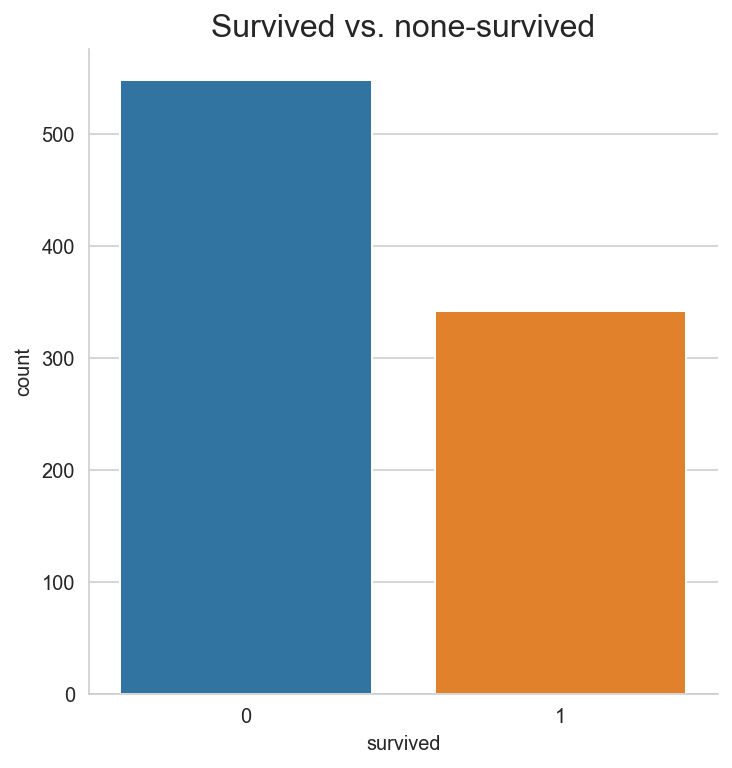

In [38]:
# plotting Survived vs. none-survived
ax= sns.factorplot('survived', data=train, kind='count')
plt.title('Survived vs. none-survived', size=16)

Overall survival. More people did not survived vs. survived.

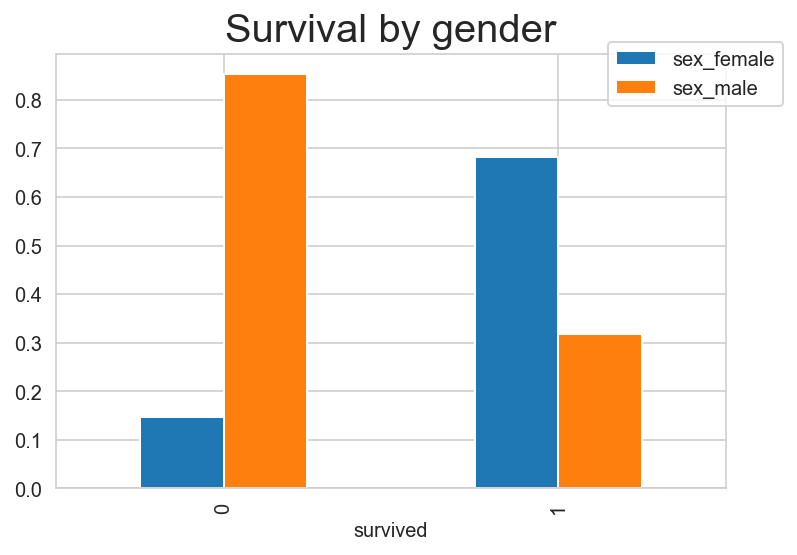

In [39]:
# plotting Survival by gender
ax2 =train.select_dtypes(exclude=['object']).drop(['id','fare','age','sib_sp','parch','embarked_Q','embarked_C','embarked_S', 'p_class'], axis=1).groupby('survived').mean().plot.bar()
ax2.legend(loc=3) # move legend to have clear plot. 
ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax2.set_title('Survival by gender',fontsize=20); # title.

More female passengers survived compared to males.

/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


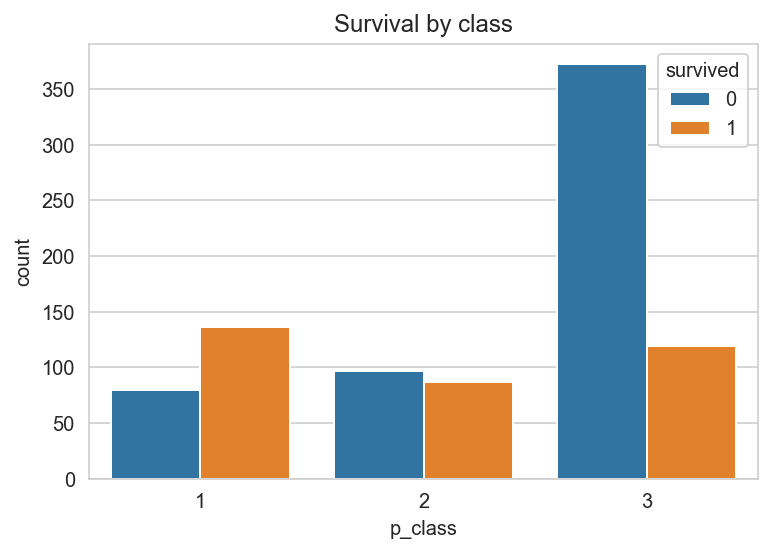

In [40]:
# plotting Survival by class
ax= sns.countplot('p_class',hue='survived',data=train)
ax.set_title('Survival by class')

plt.show()

- The highest survival rates in passengers who assigned to class 1
- The lowest survival rates in passengers who assigned to class 2.
---
- The highest mortality rates were recorded in class 3
- The lowest mortality reates were recorded in class 1

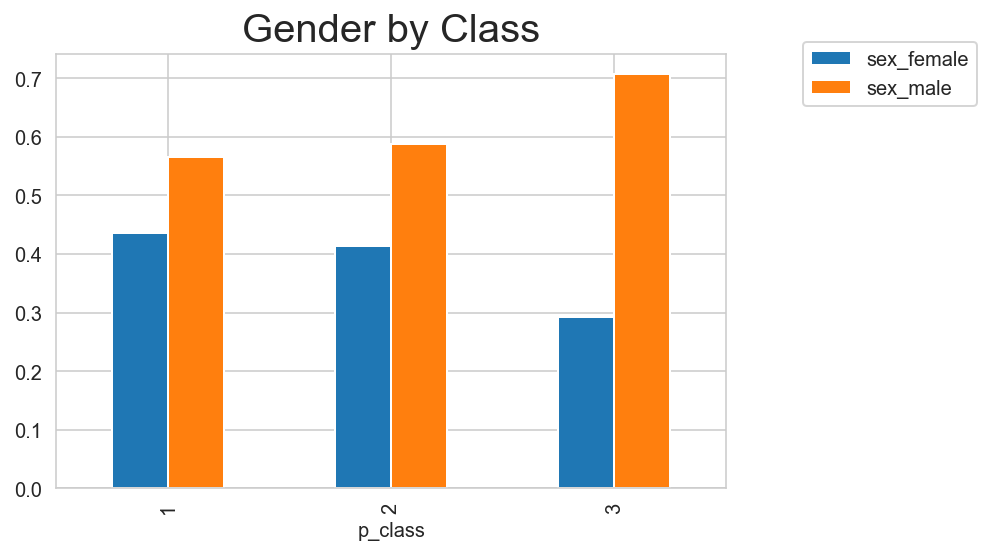

In [41]:
# plotting Gender by Class
ax2 =train.select_dtypes(exclude=['object']).drop(['id','fare','age','sib_sp','parch','embarked_Q','embarked_C','embarked_S','survived'], axis=1).groupby('p_class').mean().plot.bar()
ax2.legend(loc=3) # move legend to have clear plot. 
ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax2.set_title('Gender by Class',fontsize=20); # title.

- The number of males is higher than females in each class.
- Class 3 has the highest number of male passengers
- Class 3 has the lowest number of female passengers

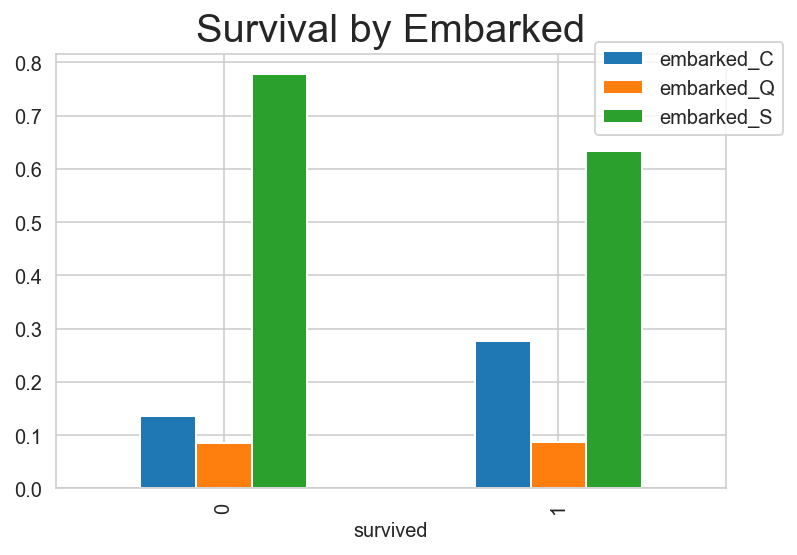

In [42]:
# plotting survival by embarked 
ax2 =train.select_dtypes(exclude=['object']).drop(['id','fare','age','sib_sp','parch','sex_male', 'sex_female', 'p_class'], axis=1).groupby('survived').mean().plot.bar()
ax2.legend(loc=3) # move legend to have clear plot. 
ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax2.set_title('Survival by Embarked',fontsize=20); # title.

- The highest survival rates were in passengers who embarked from S.

- The lowsed survival rates were in passengers who embarked from port Q.

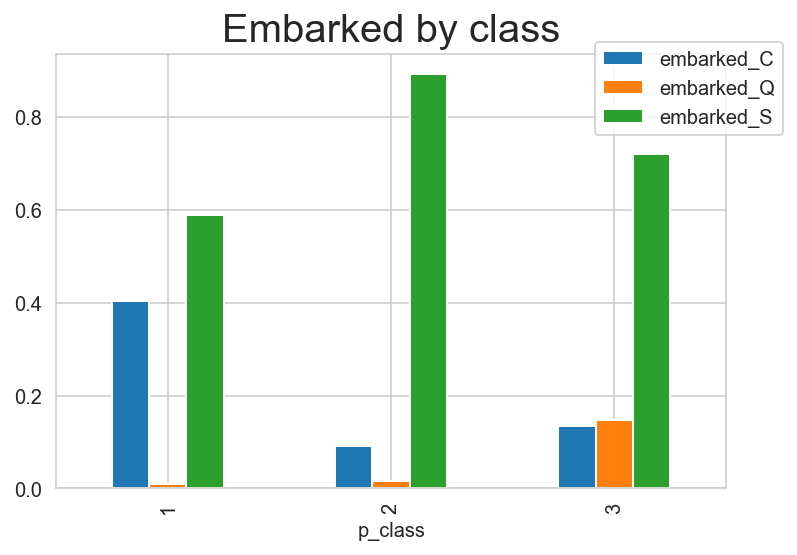

In [43]:
# plotting Embarked by class
ax2 =train.select_dtypes(exclude=['object']).drop(['id','fare','age','sib_sp','parch','sex_male', 'sex_female', 'survived'], axis=1).groupby('p_class').mean().plot.bar()
ax2.legend(loc=3) # move legend to have clear plot. 
ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax2.set_title('Embarked by class',fontsize=20); # title.

- Passengers from embarked S are the highest per each class
- Passengers from embarked Q are the lowest for class 1 and 2

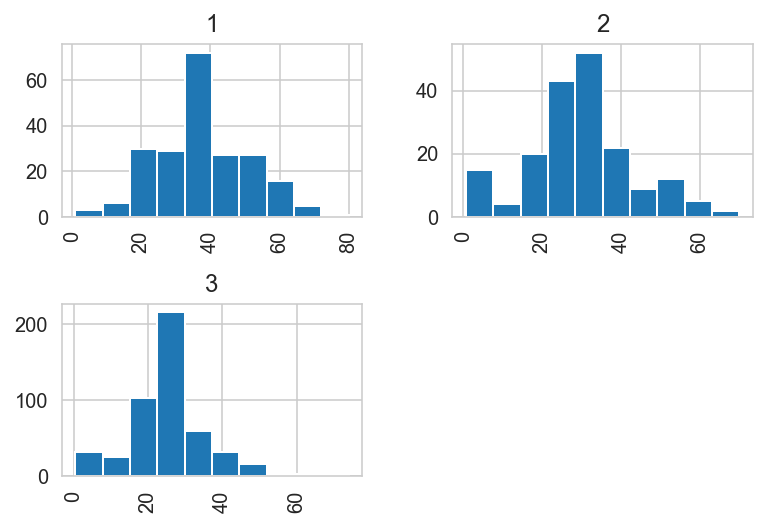

In [44]:
# plotting distribution of age for each class
train.hist(column='age', by='p_class');

- The higher the age the lower the class number
- The lower the age the higher the class number
- There is a negative correlation between age and class

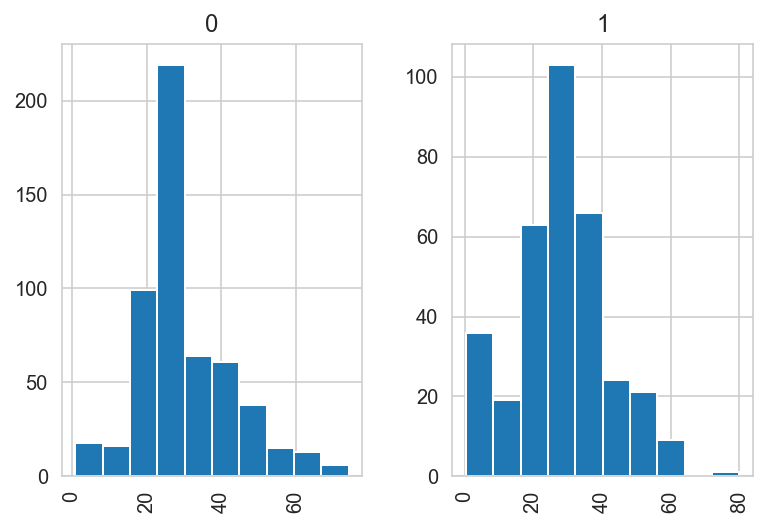

In [45]:
# plotting the distribution of Age for survived and none-survived
train.hist(column='age', by='survived');
# survived: 1, none-survived: 0

- The highest mortiality rates were in younger passengers

- As a result from both plots above, yonger people (aged 20-35) were mostly in class three which is the cheapest class (economy class), most of which did not survive.


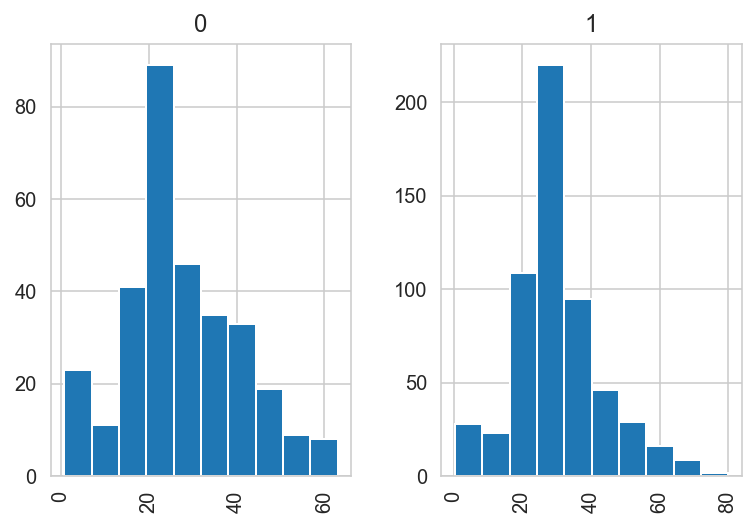

In [46]:
# plotting the distribution of age for each gender

train.hist(column='age', by= 'sex_male');
# male: 1, female: 0

- Most passengers were males aged between 20 - 40

##  Modeling

In [47]:
# Model Prep: Creating `X` and `y` variables
features_drop = ['id','name', 'ticket', 'survived']

In [48]:
# a list comprehension to select features of inetrest
selected_features = [feature for feature in train.columns if feature not in features_drop]
selected_features

['p_class',
 'age',
 'sib_sp',
 'parch',
 'fare',
 'cabin',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'sex_female',
 'sex_male']

In [49]:
# geting the columns to check.
train[selected_features].columns  

Index(['p_class', 'age', 'sib_sp', 'parch', 'fare', 'cabin', 'embarked_C',
       'embarked_Q', 'embarked_S', 'sex_female', 'sex_male'],
      dtype='object')

In [50]:
# (train data) separating the selected_column in `X_train` and `Survived` in `y_train`
X_train = train[selected_features] 
y_train = train['survived'] 

In [51]:
X_train.head() # to check

,p_class,age,sib_sp,parch,fare,cabin,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,22.0,1,0,7.2500,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,0,1,0,1


In [52]:
y_train.value_counts() # this is our target for train data

0    549
1    342
Name: survived, dtype: int64

**computing baseline accuracy for train data**

In [53]:
# Baseline accuracy (train data)
baseline_acc = 1. - y_train[y_train == 0].shape[0]/y_train.shape[0]

print('0: ', y_train[y_train == 0].shape[0]/y_train.shape[0])
print('1: ', 1- y_train[y_train == 0].shape[0]/y_train.shape[0])

0:  0.6161616161616161
1:  0.38383838383838387


#### Separating the test data into X_test and y_test. Using same features and target as above for the train data.

In [54]:
X_test = test[selected_features] # # Separating the test data using a list comprehension as the train data.
y_test = g_s_or['Survived']  # from Kaggle file (gender_submission.csv)

In [55]:
y_test.head() # to check

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [56]:
X_test.head() # to check

,p_class,age,sib_sp,parch,fare,cabin,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,34.5,0,0,7.8292,0,0,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,0,1,1,0
2,2,62.0,0,0,9.6875,0,0,1,0,0,1
3,3,27.0,0,0,8.6625,0,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,0,1,1,0


### Model instantiation

### Random forest classifier

In [57]:
# RF instance with 100 trees 
rf = RandomForestClassifier(n_estimators=100) 

# fitting rf classifier
rf = rf.fit(X_train,y_train)

# Obtaining the predictions for rf on test data.
pred_rf = rf.predict(X_test) 
pred_rf[:5] # predictions of survival for X_test using random forest

array([0, 0, 0, 1, 0])

In [58]:
# RF confusion matrix and classification reports.

# Based on Kaggle file (gender_submission.csv).
y_true = y_test # get y_test which is the true labels on the test set.

y_pred= pred_rf # get predicted labels on the test set.  
print(f"Confusion Matrix for RF:\n{confusion_matrix(y_true,y_pred)}")

# Classification Report RF

target_names = ['class 0', 'class 1']
print(f"Classification Report for RF:\n{classification_report(y_true, y_pred, target_names=target_names)}")


Confusion Matrix for RF:
[[225  41]
 [ 37 115]]
Classification Report for RF:
              precision    recall  f1-score   support

     class 0       0.86      0.85      0.85       266
     class 1       0.74      0.76      0.75       152

    accuracy                           0.81       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.81      0.81      0.81       418



#### Grid Search for Random Forest



In [59]:
# Random Forest Classifier and grid search
rf_g = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

# Runing the GridSearch with CV = 5**

gs = GridSearchCV(estimator= rf_g, cv=5, n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1) 

# Fiting grid search
gs.fit(X_train, y_train)
gs.get_params()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.6s finished


{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'max_depth': [1, 2, 3, 4, 5, 8]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 1}

In [60]:
# the score after GridSearch on test data
gs.score(X_test, y_test) # y_test == gender submission file from Kaggle.com

0.8755980861244019

In [61]:
# the score of your trained model after GridSearch on train data
gs.score(X_train, y_train)

0.9169472502805837

In [62]:
#geting the best parameters.
gs.best_params_

{'max_depth': 8}

In [63]:
# best parameter of gridsearch
rf_bset= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=gs.best_params_, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# gird search for random forest with best parameters
gs_rf_bset = GridSearchCV(estimator= rf_bset , cv=5, n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1) 

gs_rf_bset.get_params() # displaying parameters

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': {'max_depth': 8},
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(max_depth={'max_depth': 8}),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'max_depth': [1, 2, 3, 4, 5, 8]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 1}

In [64]:
# Fitting train data using best model.
gs_rf_bset.fit(X_train, y_train) # fit.

# Getting prediction for the best model
pred_rf_bset= gs_rf_bset.predict(X_test)
pred_rf_bset[:5] # displaying sample

gs_rf_bset.score(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.5s finished


0.9191919191919192

In [65]:
#  confusion matrix
#  pred_rf_bset confusion matrix and classification reports for the best model.
y_true = y_test # get y_test which is the true labels on the test set.
y_pred= pred_rf_bset # get predicted labels on the test set.  
print(f"Confusion Matrix:\n{confusion_matrix(y_true,y_pred)}")
con_mat= confusion_matrix (y_true,y_pred,labels=[1,0])

# Classification Report best model after gridsearch


target_names = ['class 0', 'class 1']
print(f"Classification Report:\n{classification_report(y_true, y_pred, target_names=target_names)}")

Confusion Matrix:
[[244  22]
 [ 34 118]]
Classification Report:
              precision    recall  f1-score   support

     class 0       0.88      0.92      0.90       266
     class 1       0.84      0.78      0.81       152

    accuracy                           0.87       418
   macro avg       0.86      0.85      0.85       418
weighted avg       0.87      0.87      0.86       418



In [66]:
baseline_acc = 1. - y_pred[y_pred == 0].shape[0]/y_pred.shape[0]
# print('Baseline:',baseline_acc) #not needed

print('0: ', y_pred[y_pred == 0].shape[0]/y_pred.shape[0])
print('1: ', 1- y_pred[y_pred == 0].shape[0]/y_pred.shape[0])

# Kaggle Submission

pred = gs_rf_bset.predict(X_test)
g_s_or['Survived']= pred
# Save the prediction into a file that matches the Kaggle submission requirements
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_best_rf.csv',index=False)

0:  0.6650717703349283
1:  0.33492822966507174


 ### submitting above prediction to Kaggle resulted in score = 0.77272 

#### Tuning the bagging classifiers with grid search

In [67]:
# bagging classifiers with the above best grid search. 
model_gs = BaggingClassifier(base_estimator=gs_rf_bset, verbose=1, n_jobs=-1)
model_gs.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    9.5s remaining:   28.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   13.0s finished


BaggingClassifier(base_estimator=GridSearchCV(cv=5,
                                              estimator=RandomForestClassifier(max_depth={'max_depth': 8}),
                                              param_grid={'max_depth': [1, 2, 3,
                                                                        4, 5,
                                                                        8]},
                                              return_train_score='warn',
                                              verbose=1),
                  n_jobs=-1, verbose=1)

In [68]:
model_gs.score(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


0.9079685746352413

In [69]:
# Kaggle Submission , # PassengerId

pred = model_gs.predict(X_test)
g_s_or['Survived']= pred
# Save the prediction into a file that matches the Kaggle submission requirements
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_rf_bagging_best_grid_search.csv',index=False)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


 ### submitting above prediction to Kaggle resulted in score = 0.77272, same as rf with gs

### Extra-trees classifier

In [70]:
#ET instance witn 100 trees
et = ExtraTreesClassifier(n_estimators=100)
et= et.fit(X_train,y_train) # fitting et classifier

# Obtaining the predictions for et on test data.
pred_et = et.predict(X_test)
pred_et[:5] # predictions of survival for X_test using extraTrees 

array([0, 0, 0, 1, 0])

In [71]:
# ET confusion matrix and classification reports.

y_true = y_test # get y_test which is the true labels on the test set.

y_pred= pred_et # get predicted labels on the test set.  
print(f"Confusion Matrix for ET:\n{confusion_matrix(y_true,y_pred)}")

# Classification Report ET

target_names = ['class 0', 'class 1']
print(f"Classification Report for ET:\n{classification_report(y_true, y_pred, target_names=target_names)}")

Confusion Matrix for ET:
[[246  31]
 [ 17 124]]
Classification Report for ET:
              precision    recall  f1-score   support

     class 0       0.94      0.89      0.91       277
     class 1       0.80      0.88      0.84       141

    accuracy                           0.89       418
   macro avg       0.87      0.88      0.87       418
weighted avg       0.89      0.89      0.89       418



### Grid Search for Extra Tree

In [72]:
# our grid
ex_g = ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

ex_gs = GridSearchCV(estimator= ex_g, cv=5, n_jobs=None,
                  iid='warn',
                  param_grid={'max_depth': [1, 2, 3, 4, 5, 8]},
                  pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
                  scoring=None, verbose=1)  

# fitting grid search with extra tree
ex_gs.fit(X_train, y_train) 
ex_gs.get_params()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.0s finished
/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': ExtraTreesClassifier(bootstrap=True),
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': {'max_depth': [1, 2, 3, 4, 5, 8]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 1}

In [73]:
ex_gs.score(X_test, y_test) # test score

0.9521531100478469

In [74]:
ex_gs.score(X_train, y_train) # train score

0.8754208754208754

In [75]:
ex_gs.best_params_ 

{'max_depth': 8}

In [76]:
ex_bset= ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth= ex_gs.best_params_, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

gs_ex_bset = GridSearchCV(estimator= ex_bset,
                          cv=5, param_grid={'max_depth': [1, 2, 3, 4, 5, 8]}, n_jobs=None,scoring=None, verbose=1) 
gs_ex_bset.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': {'max_depth': 8},
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': ExtraTreesClassifier(bootstrap=True, max_depth={'max_depth': 8}),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'max_depth': [1, 2, 3, 4, 5, 8]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

In [77]:
gs_ex_bset.fit(X_train, y_train)

pred_ex_bset= gs_ex_bset.predict(X_test)
pred_ex_bset[:5] # displaying sample

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.7s finished


array([0, 0, 0, 0, 1])

In [78]:
pred = gs_ex_bset.predict(X_test)

g_s_or['Survived'] = pred

# Saving the prediction into a file that matches the Kaggle submission requirements
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_et_gs_best_model.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.76555

# Decision Tree Classification

In [79]:
# Grid search with decision tree 
parm_grid2 = {'max_depth':[1,2,3,4,5,6,7,8]}
grid2 = GridSearchCV(DecisionTreeClassifier(), parm_grid2, cv=5, verbose = 1)
grid2.fit(X_train, y_train)
# kaggle submission
pred = grid2.predict(X_test) 
g_s_or['Survived'] = pred
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_gs_dt.csv',index=False)

grid2.best_score_    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


0.8092084614901764

 ### submitting above prediction to Kaggle resulted in score = 0.74880 

#### Tuning the bagging classifiers with grid search

In [80]:
# bagging classifer with grid search
param = { 'max_features': [0.6,0.8, 1],
        'n_estimators': [50, 200], 
         'base_estimator__max_depth': [ 5, 20],
         'max_samples':[1,0.5,0.7,0.8],
         'bootstrap':[True,False]
       
        }


model = BaggingClassifier(base_estimator=DecisionTreeClassifier())
model_gs = GridSearchCV(model,param, cv=4, verbose=1, n_jobs=-1 )
model_gs.fit(X_train, y_train)


model_gs.best_score_

model_gs.score(X_train, y_train)

# Kaggle submission. # PassengerId
pred = model_gs.predict(X_test)
g_s_or['Survived'] = pred
# Save the prediction into a file that matches the Kaggle submission requirements
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_dt_gs_bagging.csv',index=False)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   18.4s finished


 ### submitting above prediction to Kaggle resulted in score = 0.77272  

# KNN

In [81]:
# selecting X features Age and p_class
X = train[['age', 'p_class']]
y = train.survived # target

ss = StandardScaler() # instantiating scaler
Xs_train = ss.fit_transform(X) # fitting scaler
Xs_test = ss.transform(X_test[['age', 'p_class']]) # fitting scaler

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xs_train,y)
cross_val_score(knn, Xs_train, y, cv=5).mean()

knn.predict(Xs_test)
knn.score(Xs_train, y)

# kaggle submission
pred = knn.predict(Xs_test)
g_s_or['Survived'] = pred
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_KNN_st.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.50956  

# Logistic Regression

In [82]:
# Logistic Regression with all features + relative , ie. parch + sib_sp
# making new feature ['relative'] that takes the number of the relativs

X_train_lr= X_train.copy() 
X_train_lr['reltv'] = X_train_lr['sib_sp'] + X_train_lr['parch'] 
X_train_lr = X_train_lr[['p_class','sex_male','age','embarked_C','embarked_Q','embarked_S','reltv']]
X_train_ss= ss.fit_transform(X_train_lr) # standardization


test_lr= X_test.copy()
test_lr['reltv'] = test_lr['sib_sp'] + test_lr['parch']
test_lr = test_lr[['p_class','sex_male','age','embarked_C','embarked_Q','embarked_S','reltv']]
test_lr_ss= ss.transform(test_lr)


log_modal = LogisticRegression().fit(X_train_ss,y_train)
# cross_val_score(log_modal,X_train_lr,y_train,cv= 5).mean()

pred = log_modal.predict(test_lr_ss)
g_s_or['Survived'] = pred
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_lg_st_reltv.csv',index=False)


 ### submitting above prediction to Kaggle resulted in score = 0.76315  

In [83]:
# Logistic Regression with relative , ie. parch + sib_sp

X_train_lr= X_train.copy()
X_train_lr['reltv'] = X_train_lr['sib_sp'] + X_train_lr['parch']

X_train_ss= ss.fit_transform(X_train_lr)


test_lr= X_test.copy()
test_lr['reltv'] = test_lr['sib_sp'] + test_lr['parch']

test_lr_ss= ss.transform(test_lr)


log_modal = LogisticRegression().fit(X_train_ss,y_train)
# cross_val_score(log_modal,X_train_lr,y_train,cv= 5).mean()

pred = log_modal.predict(test_lr_ss)
g_s_or['Survived'] = pred
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_lg_st_reltv_only.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.76315 , same as above score

# SVM

In [84]:
# Support vector machine model
ss = StandardScaler() # initiating standard scaler
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

svm_l = svm.SVC(kernel='linear').fit(Xs_train, y_train)
svm_l.fit(Xs_train, y_train)
cross_val_score(svm_l, Xs_train, y_train, cv=5).mean()

0.7878601468834348

In [85]:
# kaggle submission
pred = svm_l.predict(X_test)
g_s_or['Survived'] = pred
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_SVM_st.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.76555 

## Gradient Boosting Classifier

In [86]:
# boosting classifier model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=0).fit(X_train, y_train)

pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.8552188552188552

In [87]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [88]:
# kaggle submission
g_s_or['Survived']= pred
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_GradientBoosting.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.76315

### Other ways to improve the accuracy of modeling (removing cabin)

In [89]:
# here, we removed the cabin column since it originally contained 687 nulls to investigate whether
# removing the column will improve model performance 

# deleting cabin column
temp1= train.drop(['id', 'survived','cabin'], axis=1).select_dtypes(exclude=['object'])
temp1 # checking

,p_class,age,sib_sp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,22.00000,1,0,7.2500,0,0,1,0,1
1,1,38.00000,1,0,71.2833,1,0,0,1,0
2,3,26.00000,0,0,7.9250,0,0,1,1,0
3,1,35.00000,1,0,53.1000,0,0,1,1,0
4,3,35.00000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,0,0,1,0,1
887,1,19.00000,0,0,30.0000,0,0,1,1,0
888,3,25.14062,1,2,23.4500,0,0,1,1,0
889,1,26.00000,0,0,30.0000,1,0,0,0,1


## logistic regression without cabin

In [90]:
logistic_regression = LogisticRegression()
logistic_regression.fit(temp1, y_train)
y_pred = logistic_regression.predict(X_test.drop(['cabin'], axis=1).select_dtypes(exclude=['object']))
logistic_regression.score(temp1, y_train)

/Users/fahdahalalyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8024691358024691

In [91]:
# kaggle submission
g_s_or['Survived']= pred
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_LogisticRegression_without_cabin.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.76315

## KNN without cabin

In [92]:
ss = StandardScaler() # instantiating scaler
Xs_train = ss.fit_transform(temp1) # fitting scaler
Xs_test = ss.transform(X_test.drop(['cabin'], axis=1).select_dtypes(exclude=['object'])) # fitting scaler

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xs_train, y)
y_pred = knn.predict(Xs_test)
knn.score(Xs_train,y) 

0.8709315375982043

In [93]:
# kaggle submission
g_s_or['Survived']= pred
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_knn_without_cabin.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.76315

## Random Forest without cabin


In [94]:
# Random forest classifier without cabin
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(temp1, y_train)
y_pred = random_forest.predict(X_test.drop(['cabin'], axis=1).select_dtypes(exclude=['object']))
random_forest.score(temp1, y_train)

0.9820426487093153

In [95]:
g_s_or['Survived']= y_pred
# Save the prediction into a file that matches the Kaggle submission requirements
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_rf_remove_cabin.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.76315

## Without Outliers

In [96]:
# calculate interquartile range:
num_colu= train.select_dtypes(include=[np.number])
lower_range={} # create dict to save lower_range for each column
upper_range={} # create dict to save lower_range for each column
for i in num_colu: # for each column.
    # Calculate Q1(first Quarter- 25) and Q3(third Quartile- 75)
    q75, q25 = np.percentile(train[i], [75 ,25]) 
    iqr = q75 - q25 # Calculate IQR = (Q3 - Q1).
    lower_range[i] = q25 -(1.5 * iqr) # lower range for a column
    upper_range[i] = q75 + (1.5 * iqr) # upper range for a column

lower_range,upper_range # can be used to find the outliers as shown in next line.



({'id': -444.0,
  'survived': -1.5,
  'p_class': 0.5,
  'age': -0.5,
  'sib_sp': -1.5,
  'parch': 0.0,
  'fare': -26.724,
  'embarked_C': 0.0,
  'embarked_Q': 0.0,
  'embarked_S': -1.5,
  'sex_female': -1.5,
  'sex_male': -1.5},
 {'id': 1336.0,
  'survived': 2.5,
  'p_class': 4.5,
  'age': 59.5,
  'sib_sp': 2.5,
  'parch': 0.0,
  'fare': 65.6344,
  'embarked_C': 0.0,
  'embarked_Q': 0.0,
  'embarked_S': 2.5,
  'sex_female': 2.5,
  'sex_male': 2.5})

In [97]:
# finding outliers
p_class_out= train[(train.p_class < lower_range['p_class']) | (train.p_class > upper_range['p_class'])] # no Outliers
age_out= train[(train.age < lower_range['age']) | (train.age > upper_range['age'])] # 26 outliers
sib_sp_out=train[(train.sib_sp < lower_range['sib_sp']) | (train.sib_sp > upper_range['sib_sp'])] # 46 outliers
parch_out = train[(train.parch < lower_range['parch']) | (train.parch > upper_range['parch'])] # 213 outliers
fare_out = train[(train.fare < lower_range['fare']) | (train.fare > upper_range['fare'])] # 116 outliers
embarked_C_out = train[(train.embarked_C < lower_range['embarked_C']) | (train.embarked_C > upper_range['embarked_C'])] # 170 outliers
embarked_Q_out = train[(train.embarked_Q < lower_range['embarked_Q']) | (train.embarked_Q > upper_range['embarked_Q'])] # 77 outliers
embarked_S_out = train[(train.embarked_S < lower_range['embarked_S']) | (train.embarked_S > upper_range['embarked_S'])] # no Outliers
sex_female_out = train[(train.sex_female < lower_range['sex_female']) | (train.sex_female > upper_range['sex_female'])] # no Outliers
sex_male_out = train[(train.sex_male < lower_range['sex_male']) | (train.sex_male > upper_range['sex_male'])] # no Outliers
p_class_out= train[(train.p_class < lower_range['p_class']) | (train.p_class > upper_range['p_class'])] # no Outliers

# printing the total number of outliers in each column
print('The total number of outliers in parch equals to {}'.format(len(parch_out)))
print('The total number of outliers in fare equals to {}'.format(len(fare_out)))
print('The total number of outliers in age equals to {}'.format(len(age_out)))
print('The total number of outliers in sib_sp equals to {}'.format(len(sib_sp_out)))
print('The total number of outliers in embarked_C equals to {}'.format(len(embarked_C_out)))
print('The total number of outliers in embarked_Q equals to {}'.format(len(embarked_Q_out)))

print('The total number of outliers in p_class equals to {}'.format(len(p_class_out)))
print('The total number of outliers in p_class equals to {}'.format(len(p_class_out)))
print('The total number of outliers in embarked_S equals to {}'.format(len(embarked_S_out)))
print('The total number of outliers in sex_female equals to {}'.format(len(sex_female_out)))
print('The total number of outliers in sex_male equals to {}'.format(len(sex_male_out)))


The total number of outliers in parch equals to 213
The total number of outliers in fare equals to 116
The total number of outliers in age equals to 26
The total number of outliers in sib_sp equals to 46
The total number of outliers in embarked_C equals to 170
The total number of outliers in embarked_Q equals to 77
The total number of outliers in p_class equals to 0
The total number of outliers in p_class equals to 0
The total number of outliers in embarked_S equals to 0
The total number of outliers in sex_female equals to 0
The total number of outliers in sex_male equals to 0


 - There are many outliers in most columns, we can not delete all of them as deleting the outliers will result in the removal of big parts of the data
 - As a future improvement, it is recommended to find a way to deal with the outliers without deleting them

## Random Forest without Embarked


In [98]:
# here, we removed embarked column since it contained 170 outliers to see whether it will affect model performance
# Random forest classifier without cabin
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train.drop(['embarked_C'], axis=1).select_dtypes(exclude=['object']), y_train)
y_pred = random_forest.predict(X_test.drop(['embarked_C'], axis=1).select_dtypes(exclude=['object']))
random_forest.score(X_train.drop(['embarked_C'], axis=1).select_dtypes(exclude=['object']), y_train)

0.9820426487093153

In [99]:
g_s_or['Survived']= y_pred
# Save the prediction into a file that matches the Kaggle submission requirements
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_rf_remove_embarked_C.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.75358


## More investigation related to outliers:

- We noticed that embarked_C has outliers equals to 170 eventhoght embarked_C is a catogrical column. 
- embarked_C column has only 0 or 1 values, which does not make sense.
- After getting the value count for embarked_C column, there are 721 values of 0 while 170 values of 1.  
- As a result, all the data points that contain 1 in embarked_C column are considered as outliers.
- We have tried to apply dummy again, but with drop first= True, and check the outliers again to make sure whether updated dummy is going to affect the model performance.



In [100]:
print (train.embarked_C.value_counts()) # to check the value count of embarked_C before apply dummy again. 

0    721
1    170
Name: embarked_C, dtype: int64


In [101]:
train_final.info() # to check the columns after applying dummy with drop first.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          891 non-null    int64  
 1   survived    891 non-null    int64  
 2   p_class     891 non-null    int64  
 3   name        891 non-null    object 
 4   age         891 non-null    float64
 5   sib_sp      891 non-null    int64  
 6   parch       891 non-null    int64  
 7   ticket      891 non-null    object 
 8   fare        891 non-null    float64
 9   cabin       891 non-null    object 
 10  sex_male    891 non-null    uint8  
 11  embarked_Q  891 non-null    uint8  
 12  embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


In [102]:
# Calculate the outliers again after updating dummy with drop_first= True.  

# calculate interquartile range:
num_colu= train_final.select_dtypes(include=[np.number])
lower_range={} # create dict to save lower_range for each column
upper_range={} # create dict to save lower_range for each column
for i in num_colu: # for each column.
    # Calculate Q1(first Quarter- 25) and Q3(third Quartile- 75)
    q75, q25 = np.percentile(train_final[i], [75 ,25]) 
    iqr = q75 - q25 # Calculate IQR = (Q3 - Q1).
    lower_range[i] = q25 -(1.5 * iqr) # lower range for a column
    upper_range[i] = q75 + (1.5 * iqr) # upper range for a column

lower_range,upper_range # can be used to find the outliers as shown in next line.



({'id': -444.0,
  'survived': -1.5,
  'p_class': 0.5,
  'age': -0.5,
  'sib_sp': -1.5,
  'parch': 0.0,
  'fare': -26.724,
  'sex_male': -1.5,
  'embarked_Q': 0.0,
  'embarked_S': -1.5},
 {'id': 1336.0,
  'survived': 2.5,
  'p_class': 4.5,
  'age': 59.5,
  'sib_sp': 2.5,
  'parch': 0.0,
  'fare': 65.6344,
  'sex_male': 2.5,
  'embarked_Q': 0.0,
  'embarked_S': 2.5})

In [103]:
# finding outliers again after updating dummy with drop_first= True. 
p_class_out= train_final[(train_final.p_class < lower_range['p_class']) | (train_final.p_class > upper_range['p_class'])] # no Outliers
age_out= train_final[(train_final.age < lower_range['age']) | (train_final.age > upper_range['age'])] # 26 outliers
sib_sp_out=train_final[(train_final.sib_sp < lower_range['sib_sp']) | (train_final.sib_sp > upper_range['sib_sp'])] # 46 outliers


parch_out = train_final[(train_final.parch < lower_range['parch']) | (train_final.parch > upper_range['parch'])] # 213 outliers
fare_out = train_final[(train_final.fare < lower_range['fare']) | (train_final.fare > upper_range['fare'])] # 116 outliers

embarked_Q_out = train_final[(train_final.embarked_Q < lower_range['embarked_Q']) | (train_final.embarked_Q > upper_range['embarked_Q'])] # 77 outliers
embarked_S_out = train_final[(train_final.embarked_S < lower_range['embarked_S']) | (train_final.embarked_S > upper_range['embarked_S'])] # no Outliers

sex_male_out = train_final[(train_final.sex_male < lower_range['sex_male']) | (train_final.sex_male > upper_range['sex_male'])] # no Outliers
p_class_out= train_final[(train_final.p_class < lower_range['p_class']) | (train_final.p_class > upper_range['p_class'])] # no Outliers

# # printing the total number of outliers in each column
print('All the columns after updating dummy with drop_first=True:\n')
print('The total number of outliers in parch equals to {}'.format(len(parch_out)))
print('The total number of outliers in fare equals to {}'.format(len(fare_out)))
print('The total number of outliers in age equals to {}'.format(len(age_out)))
print('The total number of outliers in sib_sp equals to {}'.format(len(sib_sp_out)))
print('The total number of outliers in embarked_Q equals to {}'.format(len(embarked_Q_out)))

print('The total number of outliers in p_class equals to {}'.format(len(p_class_out)))
print('The total number of outliers in embarked_S equals to {}'.format(len(embarked_S_out)))
print('The total number of outliers in sex_male equals to {}'.format(len(sex_male_out)))


# The only differences are the following columns which are related to the outliers before updating dummy.
# embarked_C and sex_female are included before the update while after the update they are not included

# The total number of outliers in embarked_C equals to 170
# The total number of outliers in sex_female equals to 0

All the columns after updating dummy with drop_first=True:

The total number of outliers in parch equals to 213
The total number of outliers in fare equals to 116
The total number of outliers in age equals to 26
The total number of outliers in sib_sp equals to 46
The total number of outliers in embarked_Q equals to 77
The total number of outliers in p_class equals to 0
The total number of outliers in embarked_S equals to 0
The total number of outliers in sex_male equals to 0


## Random Forest without Embarked_Q


In [104]:
# Try RandomForestClassifier with removing embarked_Q which has 77 outliers for the updated train and test to make sure. 

features_drop_last = ['id','name', 'ticket', 'survived']
# a list comprehension to select features of inetrest
selected_features_last = [feature for feature in train_final.columns if feature not in features_drop]
selected_features_last


X_train_final= train_final[selected_features_last]   
X_test_final= test_final[selected_features_last]
# Random forest classifier without cabin
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train_final.drop(['embarked_Q'], axis=1).select_dtypes(exclude=['object']), y_train)

y_pred = random_forest.predict(X_test_final.drop(['embarked_Q'], axis=1).select_dtypes(exclude=['object']))

random_forest.score(X_train_final.drop(['embarked_Q'], axis=1).select_dtypes(exclude=['object']), y_train)

0.9820426487093153

In [105]:
g_s_or['Survived']= y_pred
# Save the prediction into a file that matches the Kaggle submission requirements
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_rf_remove_embarked_Q_dummy_update.csv',index=False)

### submitting above prediction to Kaggle resulted in score = 0.75358

## Random Forest without parch


In [106]:
# Try RandomForestClassifier with removing parch which has 213 outliers for the updated train and test to make sure. 

features_drop_last = ['id','name', 'ticket', 'survived']
# a list comprehension to select features of inetrest
selected_features_last = [feature for feature in train_final.columns if feature not in features_drop]
selected_features_last


X_train_final= train_final[selected_features_last]   
X_test_final= test_final[selected_features_last]
# Random forest classifier without cabin
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train_final.drop(['parch'], axis=1).select_dtypes(exclude=['object']), y_train)

y_pred = random_forest.predict(X_test_final.drop(['parch'], axis=1).select_dtypes(exclude=['object']))

random_forest.score(X_train_final.drop(['parch'], axis=1).select_dtypes(exclude=['object']), y_train)

0.9809203142536476

In [107]:
g_s_or['Survived']= y_pred
# Save the prediction into a file that matches the Kaggle submission requirements
g_s_or[['PassengerId', 'Survived']].to_csv('../output data/submission_rf_remove_parch_dummy_update.csv',index=False)

 ### submitting above prediction to Kaggle resulted in score = 0.75837